# 機械学習スクラッチ 線形回帰

線形回帰スクラッチ

In [222]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=1e-10, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.cost_list = []
#         self.theta = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        loss_list = []
        theta_list = []
        # パラメータθの初期値を入力trainデータのn_feature数分作成
        self.theta = np.random.rand(X.shape[1], 1)
#         print(X.shape[1], self.theta.shape)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
#             print(self.theta)
            X = np.insert(X, 0, 1, axis=1)
            
#         print('first theta': , self.theta)
        # 仮定関数で、初期状態での入力trainデータに対する予測値θを計算
        pred = self._linear_hypothesis(X=X)
        # 初期状態での予測値θを用いて損失関数を計算 
        first_loss, _ = self.cost_function(pred, y)
        loss_list.append(first_loss)
        theta_list.append(self.theta)
        for i in range(self.iter):
#             train_y_pred = _linear_hypothesis(X=X)
            error = pred[0] - y[0]
#             print(error) (n_samples,)
            self._gradient_descent(X=X, error=error, y=y)
#             print(self.theta)
            pred = self._linear_hypothesis(X=X)
#             print(pred.shape) (n_samples, 1)
            train_loss, _ = self.cost_function(pred, y)
#             pred = self._linear_hypothesis(X=X, theta=theta)
            loss_list.append(train_loss)
            theta_list.append(self.theta)
            self.cost_list.append(train_loss)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, train_loss))
        
        min_loss_number = np.argmin(loss_list)
        self.theta = theta_list[min_loss_number]
        print(self.theta.shape)
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        pred = self._linear_hypothesis(X=X)
        return pred
    
    # 問題1
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
#         self.theta = np.random.rand(1, X.shape[1])
        h = np.dot(X, self.theta)
        return h
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        """
        パラメータthetaを更新する
        Parameters
        --------------------
        X:入力データ shape (n_samples, n_features)
        error:予測された目的変数 - 実際の目的変数 shape (n_samples, 1)
        y:実際の目的変数 shape (n_samples, 1)

        return
        --------------
        self.theta:更新後のtheta shape (n_samples, 1)
        """
        tmp = error - y
        tmp = tmp.reshape(-1, 1)
        error_times_x = np.dot(tmp.T, X)
        met_sum = np.sum(error_times_x, axis=0)
#         print(met_sum.shape, self.theta.shape)
        for j in range(X.shape[1]):
            self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])

    # 問題5
    def cost_function(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値
        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
#         print(y_pred.shape, y_pred)
        loss = np.sum((y_pred[0] - y[0])**2) / y.shape[0] * 2
        self.loss = loss
        self.val_loss = loss
        return self.loss, self.val_loss

【問題1】仮定関数

In [134]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
    """
#   self.theta = np.random.rand(1, X.shape[1])
    h = np.dot(X, self.theta)
    return h

【問題2】最急降下法

In [209]:
def _gradient_descent(self, X, error, y):
    """
    パラメータthetaを更新する
    Parameters
    --------------------
    X:入力データ shape (n_samples, n_features)
    error:予測された目的変数 - 実際の目的変数 shape (n_samples, 1)
    y:実際の目的変数 shape (n_samples, 1)

    return
    --------------
    self.theta:更新後のtheta shape (n_samples, 1)
    """
    tmp = error - y
    tmp = tmp.reshape(-1, 1)
    error_times_x = np.dot(tmp.T, X)
    met_sum = np.sum(error_times_x, axis=0)
#   print(met_sum.shape, self.theta.shape)
    for j in range(X.shape[1]):
        self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])

【問題3】推定

In [ ]:
def predict(self, X):
    """
    線形回帰を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    # 問題3
    if self.bias:
        X = np.insert(X, 0, 1, axis=1)
    pred = self._linear_hypothesis(X=X)
    return pred

【問題4】平均二乗誤差

In [127]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum((y_pred[0] - y[0])**2) / y.shape[0]
    return mse

【問題5】目的関数

In [174]:
def cost_function(self, y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
    y : 次の形のndarray, shape (n_samples,)
        正解値
    Returns
    ----------
    mse : numpy.float
        平均二乗誤差
    """
#   print(y_pred.shape, y_pred)
    loss = np.sum((y_pred[0] - y[0])**2) / y.shape[0] * 2
    self.loss = loss
    self.val_loss = loss
    return self.loss, self.val_loss

【問題6】学習と推定

In [56]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=5000, lr=1e-10, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.cost_list = []
#         self.theta = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        loss_list = []
        theta_list = []
        # パラメータθの初期値を入力trainデータのn_feature数分作成
        self.theta = np.random.rand(X.shape[1], 1)
#         print(X.shape[1], self.theta.shape)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
#             print(self.theta)
            X = np.insert(X, 0, 1, axis=1)
            
#         print('first theta': , self.theta)
        # 仮定関数で、初期状態での入力trainデータに対する予測値θを計算
        pred = self._linear_hypothesis(X=X)
        # 初期状態での予測値θを用いて損失関数を計算 
        first_loss, _ = self.cost_function(pred, y)
        loss_list.append(first_loss)
        theta_list.append(self.theta)
        for i in range(self.iter):
#             train_y_pred = _linear_hypothesis(X=X)
            error = pred[0] - y[0]
#             print(error) (n_samples,)
            self._gradient_descent(X=X, error=error, y=y)
#             print(self.theta)
            pred = self._linear_hypothesis(X=X)
#             print(pred.shape) (n_samples, 1)
            train_loss, _ = self.cost_function(pred, y)
#             pred = self._linear_hypothesis(X=X, theta=theta)
            loss_list.append(train_loss)
            theta_list.append(self.theta)
            self.cost_list.append(train_loss)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, train_loss))
        
        min_loss_number = np.argmin(loss_list)
        self.theta = theta_list[min_loss_number]
        print(self.theta.shape)
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        pred = self._linear_hypothesis(X=X)
        return pred
    
    # 問題1
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
#         self.theta = np.random.rand(1, X.shape[1])
        h = np.dot(X, self.theta)
        return h
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        """
        パラメータthetaを更新する
        Parameters
        --------------------
        X:入力データ shape (n_samples, n_features)
        error:予測された目的変数 - 実際の目的変数 shape (n_samples, 1)
        y:実際の目的変数 shape (n_samples, 1)

        return
        --------------
        self.theta:更新後のtheta shape (n_samples, 1)
        """
        tmp = error - y
        tmp = tmp.reshape(-1, 1)
#         error_times_x = np.dot(tmp.T, X)
        error_times_x = tmp * X
        met_sum = np.sum(error_times_x, axis=0)
#         print(met_sum.shape, self.theta.shape)
        for j in range(X.shape[1]):
            self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])

    # 問題5
    def cost_function(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値
        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
#         print(y_pred.shape, y_pred)
        loss = np.sum((y_pred[0] - y[0])**2) / y.shape[0] / 2
        self.loss = loss
        self.val_loss = loss
        return self.loss, self.val_loss

In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

DIR_PATH = '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week4/house-prices-advanced-regression-techniques/'
train = pd.read_csv(DIR_PATH + 'train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [58]:
# train['GrLivArea'] = train['GrLivArea'].apply(np.log)
# train['SalePrice'] = train['SalePrice'].apply(np.log)
x_train = train[['GrLivArea', 'YearBuilt']]
target = train['SalePrice']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [60]:
LR = ScratchLinearRegression(bias=True, verbose=True)
LR.fit(X_train, y_train)

1 / 5000 times done | loss value: 20458955.976863112
2 / 5000 times done | loss value: 20410107.205284048
3 / 5000 times done | loss value: 20361347.959248357
4 / 5000 times done | loss value: 20312678.107108556
5 / 5000 times done | loss value: 20264097.51739633
6 / 5000 times done | loss value: 20215606.058822267
7 / 5000 times done | loss value: 20167203.600275673
8 / 5000 times done | loss value: 20118890.010824278
9 / 5000 times done | loss value: 20070665.159714065
10 / 5000 times done | loss value: 20022528.916368976
11 / 5000 times done | loss value: 19974481.150390726
12 / 5000 times done | loss value: 19926521.73155852
13 / 5000 times done | loss value: 19878650.529828873
14 / 5000 times done | loss value: 19830867.415335327
15 / 5000 times done | loss value: 19783172.258388266
16 / 5000 times done | loss value: 19735564.929474637
17 / 5000 times done | loss value: 19688045.299257744
18 / 5000 times done | loss value: 19640613.238577012
19 / 5000 times done | loss value: 1959

441 / 5000 times done | loss value: 6002628.23976024
442 / 5000 times done | loss value: 5982656.712545492
443 / 5000 times done | loss value: 5962731.186637257
444 / 5000 times done | loss value: 5942851.590208799
445 / 5000 times done | loss value: 5923017.851533456
446 / 5000 times done | loss value: 5903229.898984502
447 / 5000 times done | loss value: 5883487.661035017
448 / 5000 times done | loss value: 5863791.066257745
449 / 5000 times done | loss value: 5844140.043324971
450 / 5000 times done | loss value: 5824534.521008383
451 / 5000 times done | loss value: 5804974.428178946
452 / 5000 times done | loss value: 5785459.693806761
453 / 5000 times done | loss value: 5765990.246960942
454 / 5000 times done | loss value: 5746566.0168094775
455 / 5000 times done | loss value: 5727186.932619103
456 / 5000 times done | loss value: 5707852.923755165
457 / 5000 times done | loss value: 5688563.919681502
458 / 5000 times done | loss value: 5669319.849960292
459 / 5000 times done | loss

916 / 5000 times done | loss value: 605663.1492486203
917 / 5000 times done | loss value: 600984.7473577927
918 / 5000 times done | loss value: 596327.4548476016
919 / 5000 times done | loss value: 591691.2350997899
920 / 5000 times done | loss value: 587076.0515490221
921 / 5000 times done | loss value: 582481.8676828236
922 / 5000 times done | loss value: 577908.6470415001
923 / 5000 times done | loss value: 573356.3532180696
924 / 5000 times done | loss value: 568824.9498581934
925 / 5000 times done | loss value: 564314.4006601004
926 / 5000 times done | loss value: 559824.6693745217
927 / 5000 times done | loss value: 555355.7198046132
928 / 5000 times done | loss value: 550907.5158058897
929 / 5000 times done | loss value: 546480.0212861518
930 / 5000 times done | loss value: 542073.2002054156
931 / 5000 times done | loss value: 537687.0165758436
932 / 5000 times done | loss value: 533321.4344616708
933 / 5000 times done | loss value: 528976.4179791387
934 / 5000 times done | loss

1446 / 5000 times done | loss value: 332006.7031128612
1447 / 5000 times done | loss value: 334485.0773487618
1448 / 5000 times done | loss value: 336971.07602188893
1449 / 5000 times done | loss value: 339464.68250763655
1450 / 5000 times done | loss value: 341965.8802070233
1451 / 5000 times done | loss value: 344474.6525466547
1452 / 5000 times done | loss value: 346990.98297869775
1453 / 5000 times done | loss value: 349514.85498083406
1454 / 5000 times done | loss value: 352046.252056232
1455 / 5000 times done | loss value: 354585.1577335072
1456 / 5000 times done | loss value: 357131.55556669016
1457 / 5000 times done | loss value: 359685.4291351882
1458 / 5000 times done | loss value: 362246.76204375486
1459 / 5000 times done | loss value: 364815.53792244766
1460 / 5000 times done | loss value: 367391.74042659905
1461 / 5000 times done | loss value: 369975.3532367806
1462 / 5000 times done | loss value: 372566.36005876394
1463 / 5000 times done | loss value: 375164.74462348904
1

1936 / 5000 times done | loss value: 2189285.514306868
1937 / 5000 times done | loss value: 2193933.086139572
1938 / 5000 times done | loss value: 2198582.6131744985
1939 / 5000 times done | loss value: 2203234.0878771963
1940 / 5000 times done | loss value: 2207887.502726047
1941 / 5000 times done | loss value: 2212542.8502122527
1942 / 5000 times done | loss value: 2217200.1228398224
1943 / 5000 times done | loss value: 2221859.313125533
1944 / 5000 times done | loss value: 2226520.4135989337
1945 / 5000 times done | loss value: 2231183.416802321
1946 / 5000 times done | loss value: 2235848.3152907128
1947 / 5000 times done | loss value: 2240515.1016318393
1948 / 5000 times done | loss value: 2245183.7684061206
1949 / 5000 times done | loss value: 2249854.3082066486
1950 / 5000 times done | loss value: 2254526.713639168
1951 / 5000 times done | loss value: 2259200.977322057
1952 / 5000 times done | loss value: 2263877.0918863234
1953 / 5000 times done | loss value: 2268555.0499755624

2119 / 5000 times done | loss value: 3065332.752933275
2120 / 5000 times done | loss value: 3070224.758288745
2121 / 5000 times done | loss value: 3075117.5363614135
2122 / 5000 times done | loss value: 3080011.0816824553
2123 / 5000 times done | loss value: 3084905.388792886
2124 / 5000 times done | loss value: 3089800.45224355
2125 / 5000 times done | loss value: 3094696.2665951205
2126 / 5000 times done | loss value: 3099592.8264180603
2127 / 5000 times done | loss value: 3104490.1262926157
2128 / 5000 times done | loss value: 3109388.1608088207
2129 / 5000 times done | loss value: 3114286.9245664626
2130 / 5000 times done | loss value: 3119186.412175066
2131 / 5000 times done | loss value: 3124086.6182538983
2132 / 5000 times done | loss value: 3128987.5374319353
2133 / 5000 times done | loss value: 3133889.164347849
2134 / 5000 times done | loss value: 3138791.4936500085
2135 / 5000 times done | loss value: 3143694.5199964503
2136 / 5000 times done | loss value: 3148598.2380548855

2511 / 5000 times done | loss value: 4996276.944277625
2512 / 5000 times done | loss value: 5001138.23158713
2513 / 5000 times done | loss value: 5005998.776028252
2514 / 5000 times done | loss value: 5010858.575060146
2515 / 5000 times done | loss value: 5015717.626147463
2516 / 5000 times done | loss value: 5020575.926760313
2517 / 5000 times done | loss value: 5025433.47437424
2518 / 5000 times done | loss value: 5030290.266470268
2519 / 5000 times done | loss value: 5035146.300534834
2520 / 5000 times done | loss value: 5040001.574059817
2521 / 5000 times done | loss value: 5044856.084542518
2522 / 5000 times done | loss value: 5049709.829485652
2523 / 5000 times done | loss value: 5054562.806397338
2524 / 5000 times done | loss value: 5059415.012791079
2525 / 5000 times done | loss value: 5064266.446185799
2526 / 5000 times done | loss value: 5069117.104105767
2527 / 5000 times done | loss value: 5073966.984080649
2528 / 5000 times done | loss value: 5078816.08364546
2529 / 5000 t

3129 / 5000 times done | loss value: 7786964.078109256
3130 / 5000 times done | loss value: 7791053.028768763
3131 / 5000 times done | loss value: 7795140.440465268
3132 / 5000 times done | loss value: 7799226.312812502
3133 / 5000 times done | loss value: 7803310.645426208
3134 / 5000 times done | loss value: 7807393.437924109
3135 / 5000 times done | loss value: 7811474.689925927
3136 / 5000 times done | loss value: 7815554.401053365
3137 / 5000 times done | loss value: 7819632.5709300935
3138 / 5000 times done | loss value: 7823709.199181774
3139 / 5000 times done | loss value: 7827784.285436034
3140 / 5000 times done | loss value: 7831857.8293224815
3141 / 5000 times done | loss value: 7835929.830472678
3142 / 5000 times done | loss value: 7840000.28852016
3143 / 5000 times done | loss value: 7844069.203100419
3144 / 5000 times done | loss value: 7848136.573850906
3145 / 5000 times done | loss value: 7852202.40041101
3146 / 5000 times done | loss value: 7856266.682422081
3147 / 500

3642 / 5000 times done | loss value: 9678631.334326861
3643 / 5000 times done | loss value: 9681916.014448527
3644 / 5000 times done | loss value: 9685199.153707337
3645 / 5000 times done | loss value: 9688480.752376439
3646 / 5000 times done | loss value: 9691760.810729716
3647 / 5000 times done | loss value: 9695039.329041792
3648 / 5000 times done | loss value: 9698316.307588028
3649 / 5000 times done | loss value: 9701591.746644482
3650 / 5000 times done | loss value: 9704865.646487968
3651 / 5000 times done | loss value: 9708138.007396024
3652 / 5000 times done | loss value: 9711408.829646882
3653 / 5000 times done | loss value: 9714678.113519529
3654 / 5000 times done | loss value: 9717945.859293662
3655 / 5000 times done | loss value: 9721212.06724969
3656 / 5000 times done | loss value: 9724476.737668732
3657 / 5000 times done | loss value: 9727739.870832661
3658 / 5000 times done | loss value: 9731001.467024004
3659 / 5000 times done | loss value: 9734261.52652606
3660 / 5000 

4215 / 5000 times done | loss value: 11319303.601344593
4216 / 5000 times done | loss value: 11321766.890739093
4217 / 5000 times done | loss value: 11324228.87481519
4218 / 5000 times done | loss value: 11326689.554064617
4219 / 5000 times done | loss value: 11329148.928979218
4220 / 5000 times done | loss value: 11331607.00005095
4221 / 5000 times done | loss value: 11334063.767771935
4222 / 5000 times done | loss value: 11336519.232634356
4223 / 5000 times done | loss value: 11338973.395130554
4224 / 5000 times done | loss value: 11341426.25575299
4225 / 5000 times done | loss value: 11343877.81499421
4226 / 5000 times done | loss value: 11346328.073346928
4227 / 5000 times done | loss value: 11348777.031303933
4228 / 5000 times done | loss value: 11351224.689358164
4229 / 5000 times done | loss value: 11353671.04800264
4230 / 5000 times done | loss value: 11356116.107730525
4231 / 5000 times done | loss value: 11358559.869035086
4232 / 5000 times done | loss value: 11361002.3324096

4796 / 5000 times done | loss value: 12546814.543126853
4797 / 5000 times done | loss value: 12548603.81951649
4798 / 5000 times done | loss value: 12550392.080722198
4799 / 5000 times done | loss value: 12552179.327229548
4800 / 5000 times done | loss value: 12553965.559524
4801 / 5000 times done | loss value: 12555750.778090933
4802 / 5000 times done | loss value: 12557534.983415596
4803 / 5000 times done | loss value: 12559318.175983159
4804 / 5000 times done | loss value: 12561100.35627866
4805 / 5000 times done | loss value: 12562881.52478706
4806 / 5000 times done | loss value: 12564661.681993209
4807 / 5000 times done | loss value: 12566440.828381851
4808 / 5000 times done | loss value: 12568218.964437636
4809 / 5000 times done | loss value: 12569996.090645084
4810 / 5000 times done | loss value: 12571772.207488641
4811 / 5000 times done | loss value: 12573547.31545262
4812 / 5000 times done | loss value: 12575321.415021267
4813 / 5000 times done | loss value: 12577094.506678684

In [61]:
a = LR.predict(X_test)

【問題7】学習曲線のプロット

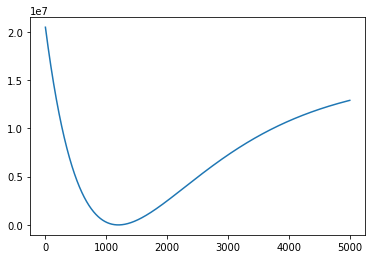

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(5000), LR.cost_list)
plt.show()

【問題8】（アドバンス課題）バイアス項の除去

In [216]:
# 初期値bias=False
no_bias_LR = ScratchLinearRegression(verbose=True)
no_bias_LR.fit(X_train, y_train)

1 / 1000 times done | loss value: 110584925.74485457
2 / 1000 times done | loss value: 110296573.33074486
3 / 1000 times done | loss value: 110008811.64517792
4 / 1000 times done | loss value: 109721639.6885082
5 / 1000 times done | loss value: 109435056.46266788
6 / 1000 times done | loss value: 109149060.9711644
7 / 1000 times done | loss value: 108863652.21907806
8 / 1000 times done | loss value: 108578829.21305968
9 / 1000 times done | loss value: 108294590.96132807
10 / 1000 times done | loss value: 108010936.47366774
11 / 1000 times done | loss value: 107727864.76142646
12 / 1000 times done | loss value: 107445374.83751287
13 / 1000 times done | loss value: 107163465.71639405
14 / 1000 times done | loss value: 106882136.41409321
15 / 1000 times done | loss value: 106601385.94818726
16 / 1000 times done | loss value: 106321213.33780448
17 / 1000 times done | loss value: 106041617.603622
18 / 1000 times done | loss value: 105762597.76786366
19 / 1000 times done | loss value: 105484

641 / 1000 times done | loss value: 12457685.561813047
642 / 1000 times done | loss value: 12397636.285523519
643 / 1000 times done | loss value: 12337776.638080113
644 / 1000 times done | loss value: 12278106.262545027
645 / 1000 times done | loss value: 12218624.802567458
646 / 1000 times done | loss value: 12159331.90238261
647 / 1000 times done | loss value: 12100227.206810823
648 / 1000 times done | loss value: 12041310.361256624
649 / 1000 times done | loss value: 11982581.011707861
650 / 1000 times done | loss value: 11924038.804734757
651 / 1000 times done | loss value: 11865683.387489038
652 / 1000 times done | loss value: 11807514.40770298
653 / 1000 times done | loss value: 11749531.513688538
654 / 1000 times done | loss value: 11691734.354336426
655 / 1000 times done | loss value: 11634122.579115225
656 / 1000 times done | loss value: 11576695.838070484
657 / 1000 times done | loss value: 11519453.781823795
658 / 1000 times done | loss value: 11462396.061571924
659 / 1000 t

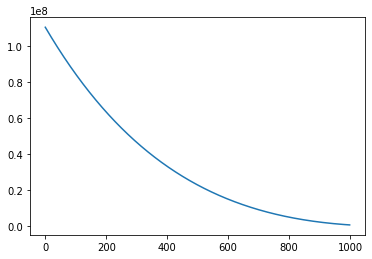

In [217]:
plt.plot(range(1000), no_bias_LR.cost_list)
plt.show()

【問題9】（アドバンス課題）特徴量の多次元化

In [225]:
# 入力を3次元で実施
x_train = train[['GrLivArea', 'YearBuilt', 'LotArea']]
target = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [226]:
LR_3 = ScratchLinearRegression(bias=True, verbose=True)
LR_3.fit(X_train, y_train)

1 / 1000 times done | loss value: 63324091.87793017
2 / 1000 times done | loss value: 59375582.3037605
3 / 1000 times done | loss value: 55612036.3813758
4 / 1000 times done | loss value: 52026812.69968253
5 / 1000 times done | loss value: 48613488.00524299
6 / 1000 times done | loss value: 45365850.30229486
7 / 1000 times done | loss value: 42277892.16719649
8 / 1000 times done | loss value: 39343804.27069048
9 / 1000 times done | loss value: 36557969.10158173
10 / 1000 times done | loss value: 33914954.885622256
11 / 1000 times done | loss value: 31409509.69358539
12 / 1000 times done | loss value: 29036555.73269725
13 / 1000 times done | loss value: 26791183.815771513
14 / 1000 times done | loss value: 24668648.002567925
15 / 1000 times done | loss value: 22664360.408062495
16 / 1000 times done | loss value: 20773886.17248079
17 / 1000 times done | loss value: 18992938.58810364
18 / 1000 times done | loss value: 17317374.37800776
19 / 1000 times done | loss value: 15743189.122052552

511 / 1000 times done | loss value: 70749416.90652679
512 / 1000 times done | loss value: 70750969.76400833
513 / 1000 times done | loss value: 70752498.73221812
514 / 1000 times done | loss value: 70754004.17841788
515 / 1000 times done | loss value: 70755486.46423101
516 / 1000 times done | loss value: 70756945.94572882
517 / 1000 times done | loss value: 70758382.97351554
518 / 1000 times done | loss value: 70759797.89281209
519 / 1000 times done | loss value: 70761191.0435386
520 / 1000 times done | loss value: 70762562.76039536
521 / 1000 times done | loss value: 70763913.37294309
522 / 1000 times done | loss value: 70765243.20568132
523 / 1000 times done | loss value: 70766552.57812627
524 / 1000 times done | loss value: 70767841.80488694
525 / 1000 times done | loss value: 70769111.19574036
526 / 1000 times done | loss value: 70770361.05570577
527 / 1000 times done | loss value: 70771591.6851173
528 / 1000 times done | loss value: 70772803.37969592
529 / 1000 times done | loss v

825 / 1000 times done | loss value: 70849547.96111947
826 / 1000 times done | loss value: 70849559.86653057
827 / 1000 times done | loss value: 70849571.58866127
828 / 1000 times done | loss value: 70849583.13033319
829 / 1000 times done | loss value: 70849594.49432437
830 / 1000 times done | loss value: 70849605.68337007
831 / 1000 times done | loss value: 70849616.70016357
832 / 1000 times done | loss value: 70849627.5473567
833 / 1000 times done | loss value: 70849638.2275603
834 / 1000 times done | loss value: 70849648.7433452
835 / 1000 times done | loss value: 70849659.09724244
836 / 1000 times done | loss value: 70849669.29174429
837 / 1000 times done | loss value: 70849679.32930467
838 / 1000 times done | loss value: 70849689.21233954
839 / 1000 times done | loss value: 70849698.94322774
840 / 1000 times done | loss value: 70849708.52431162
841 / 1000 times done | loss value: 70849717.95789732
842 / 1000 times done | loss value: 70849727.24625549
843 / 1000 times done | loss va

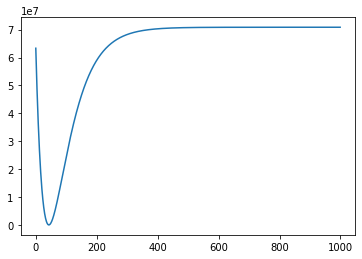

In [227]:
plt.plot(range(1000), LR_3.cost_list)
plt.show()

自力実装したもので3次元の特徴量で勾配計算を同じ条件で行うと、損失値の増減が激しくなることがわかる。

【問題10】（アドバンス課題）更新式の導出

<center><img src="S__127909891.jpg"　width=800px></center>

【問題11】（アドバンス課題）局所最適解の問題

自力証明はできなかったので、恐らくこれが正解と思うサイトを以下に掲載<br>
http://www.st.nanzan-u.ac.jp/info/marble/book/chapter11.pdf<br>